In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib_inline as mi
import matplotlib.pylab as plt

In [45]:
Tel_data = pd.read_csv("Telecom_Churn.csv")

In [46]:
Tel_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,False,NaN,NaN,NaN
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,True,NaN,NaN,NaN
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,True,NaN,NaN,NaN
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,105,8.53,7.7,6,2.08,2,False,NaN,NaN,NaN
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,90,8.04,11.1,1,3.00,1,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,94,11.14,11.5,7,3.11,2,False,NaN,NaN,NaN
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,73,10.33,8.1,3,2.19,1,False,NaN,NaN,NaN
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,134,9.45,13.2,8,3.56,3,False,NaN,NaN,NaN
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,82,8.72,11.6,4,3.13,1,False,NaN,NaN,NaN


In [51]:
Tel_data.groupby('State').Tel_data["State"]

AttributeError: 'DataFrameGroupBy' object has no attribute 'Tel_data'

In [5]:
Tel_data.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22'],axis=1, inplace= True)

In [6]:
Tel_data.isnull().sum() #Check for null data

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
Tel_data.isnull().duplicated().sum() # check for duplicate

666

## Outlier finding

In [8]:
Tel_data.drop(['Churn'],axis=1, inplace= True) # Remove churn as 0 and 1 will become one cluster


In [51]:
cat = []
num = []
for i in Tel_data.columns:
    if Tel_data[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)
        
        

In [52]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [53]:
cat

['State', 'International plan', 'Voice mail plan']

In [19]:
Tel_data.shape

(667, 19)

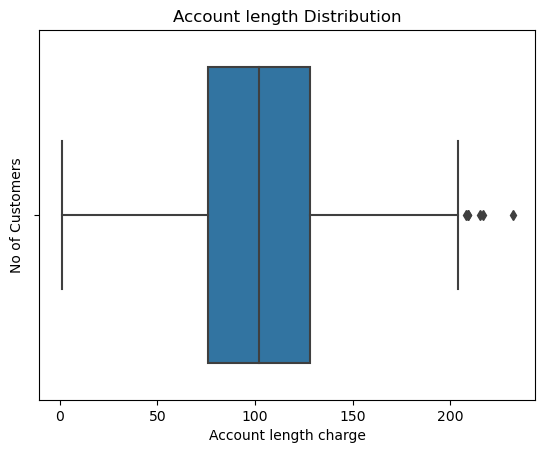

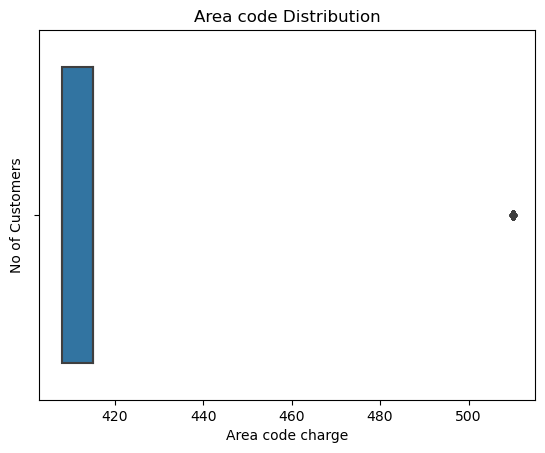

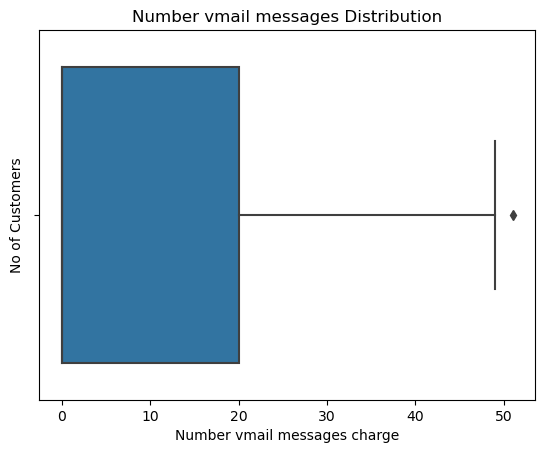

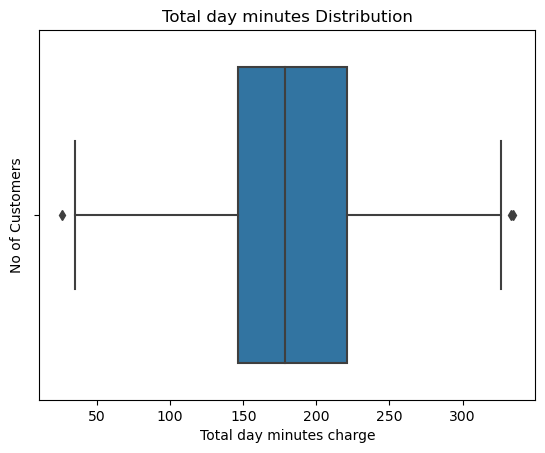

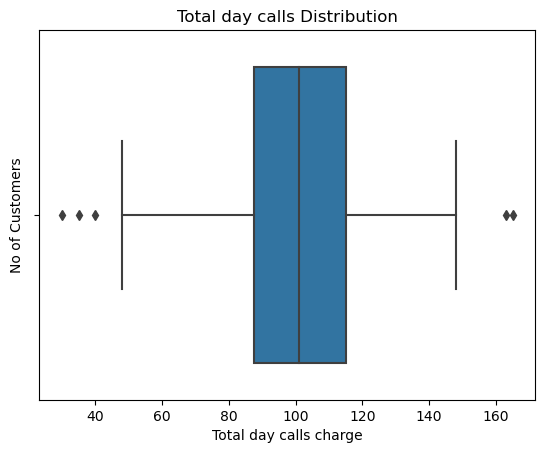

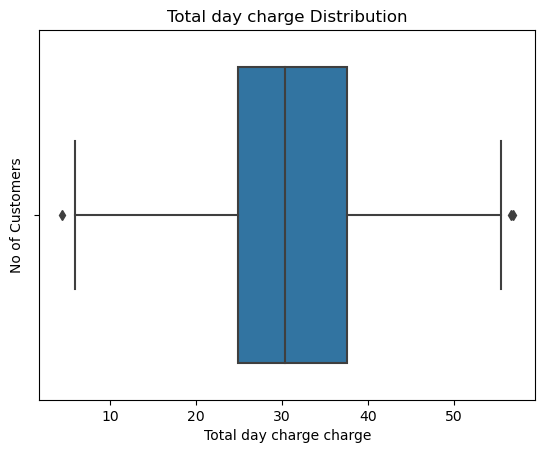

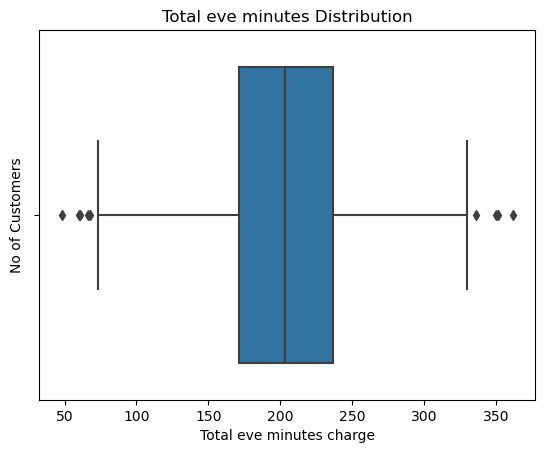

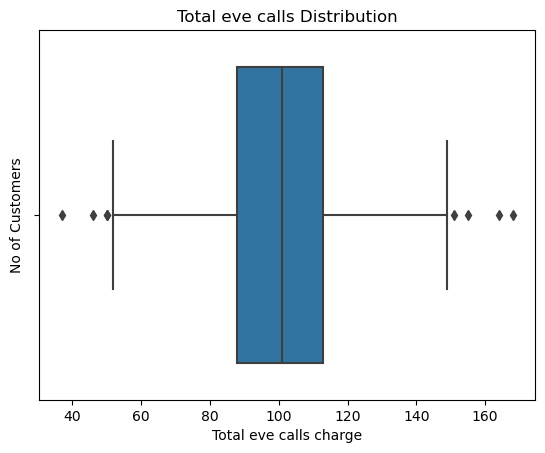

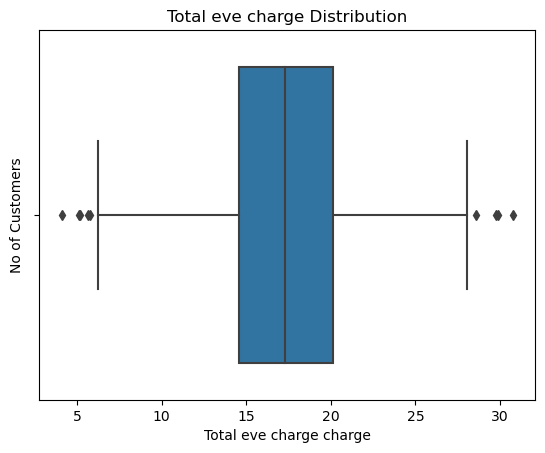

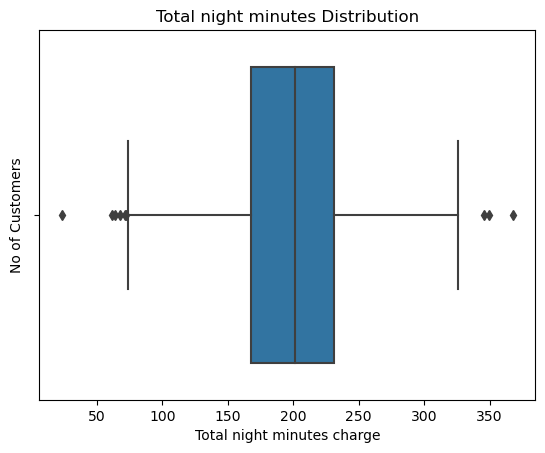

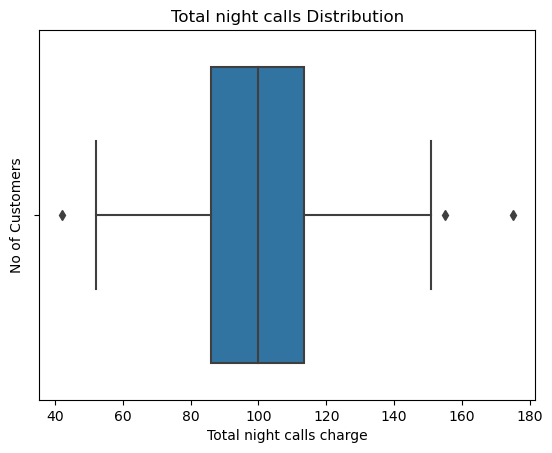

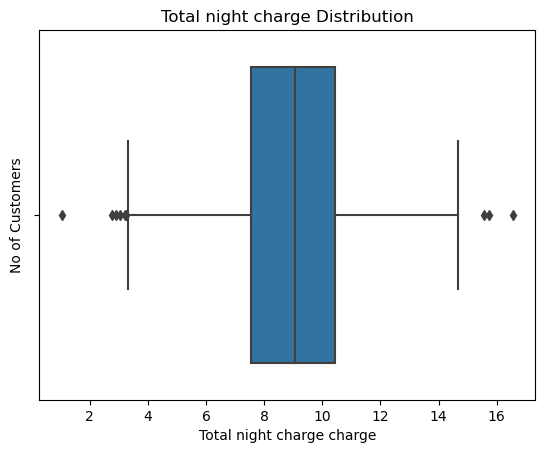

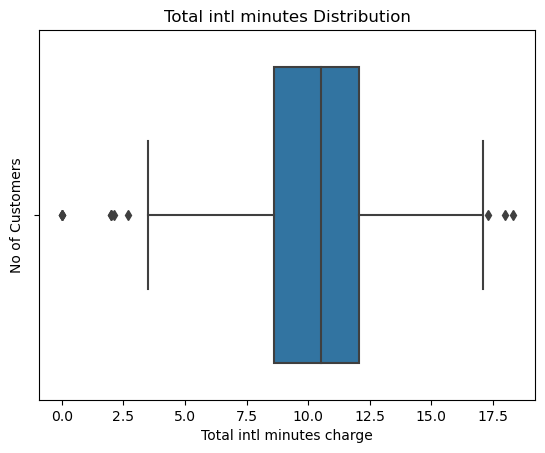

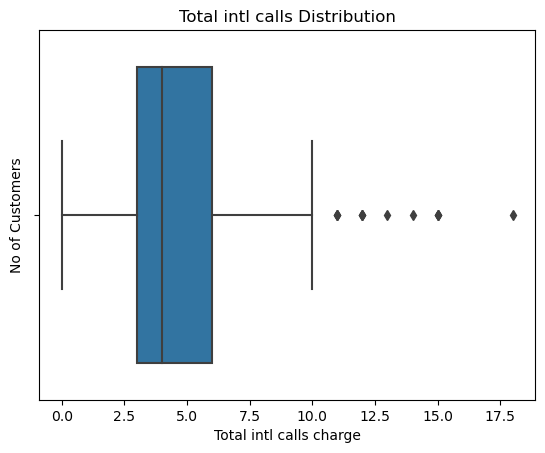

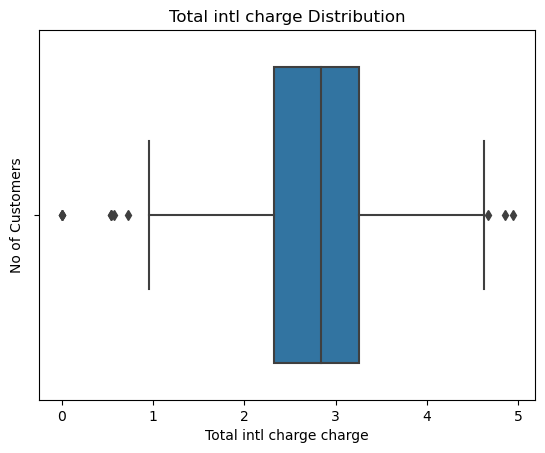

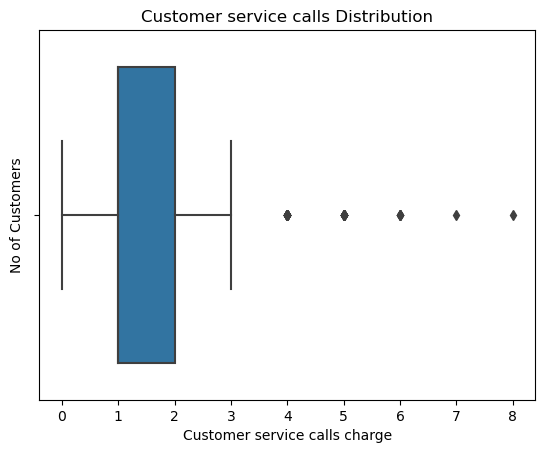

In [54]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [56]:
# Do not take Churn as it will cluster based on 1 and 0
for col in num:
    Q1 = Tel_data[col].quantile(0.25)
    Q2 = Tel_data[col].quantile(0.75)
    IQR = Q2 - Q1
    lr = Q1 - 1.5*IQR
    ur = Q2 + 1.5*IQR
    Tel_data[col] = np.where(Tel_data[col]>ur,ur,Tel_data[col]) # Remove outlier with upper range
    Tel_data[col] = np.where(Tel_data[col]<lr,lr,Tel_data[col])

In [21]:
Tel_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


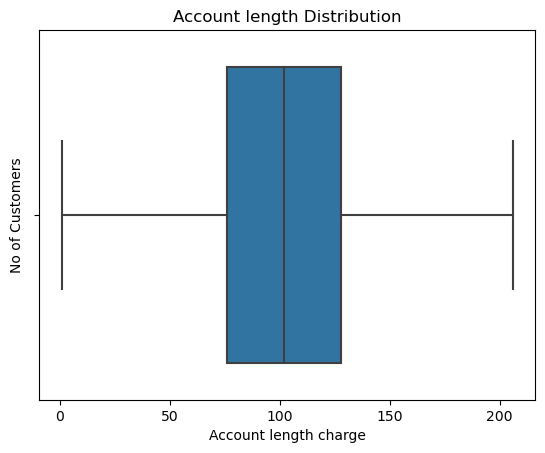

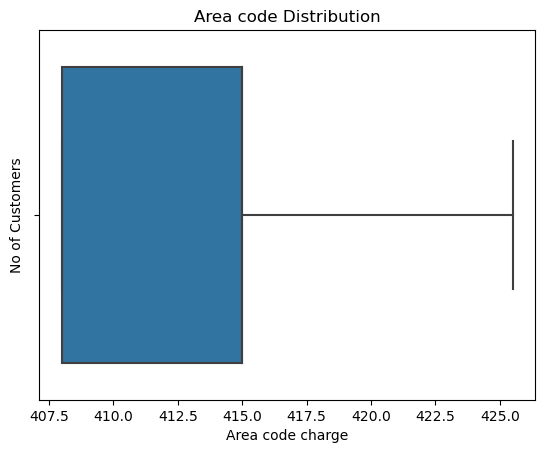

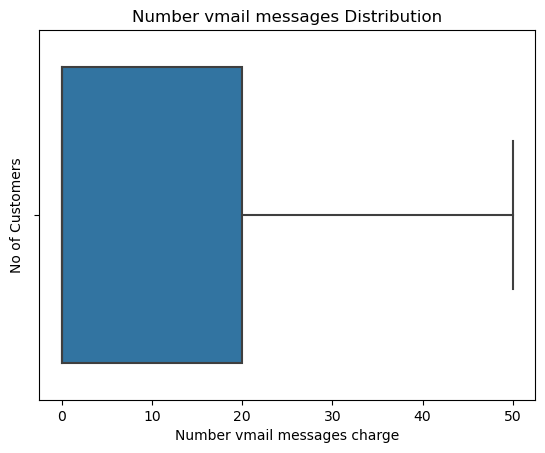

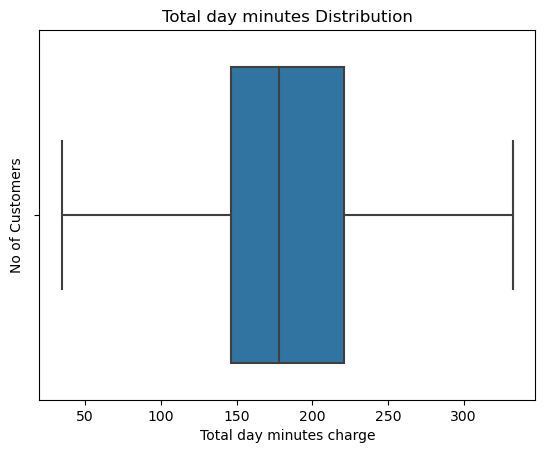

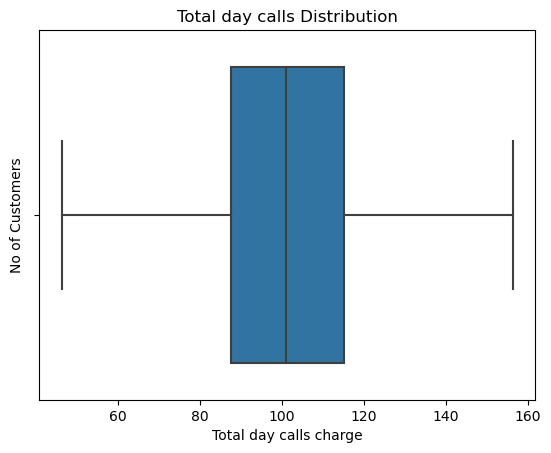

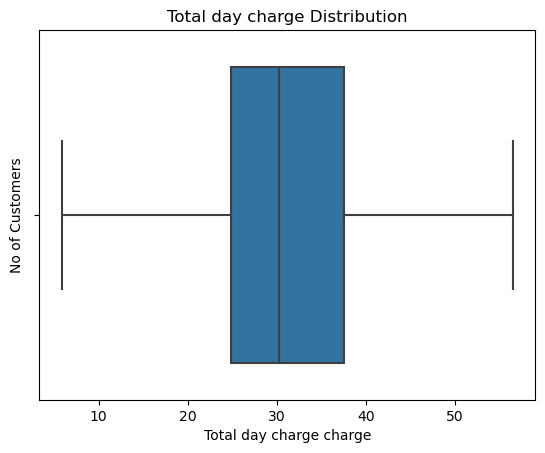

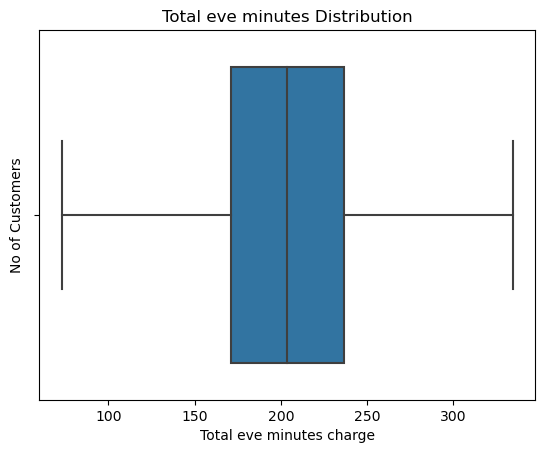

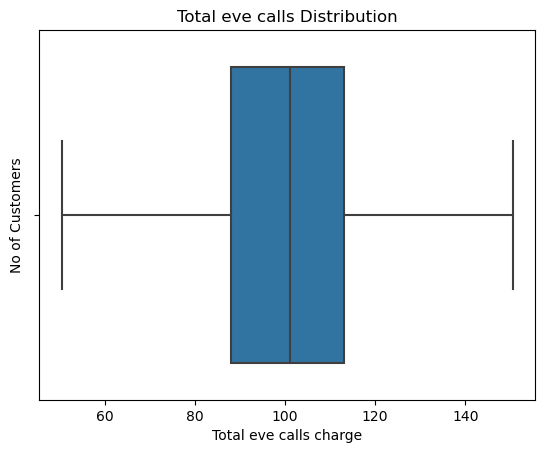

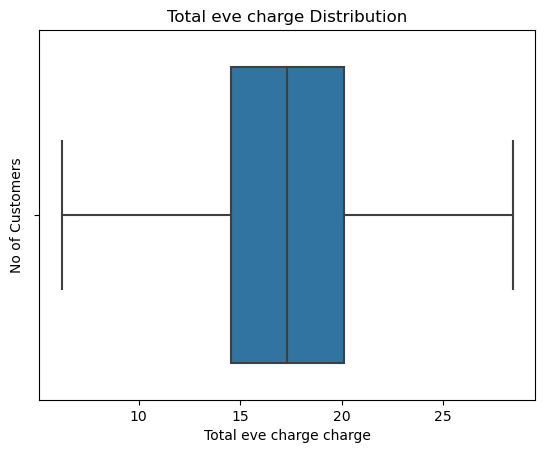

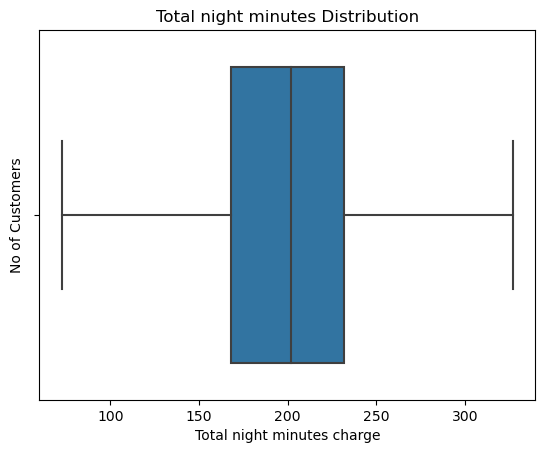

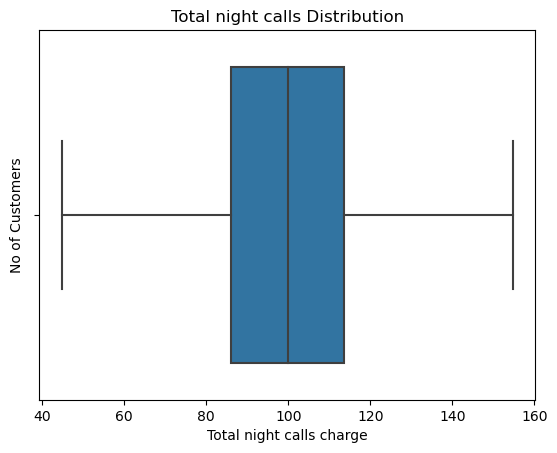

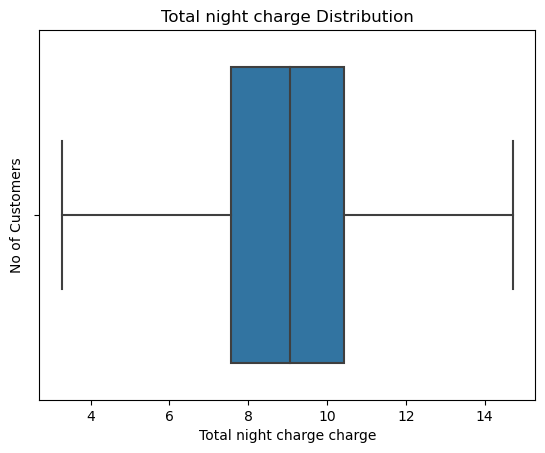

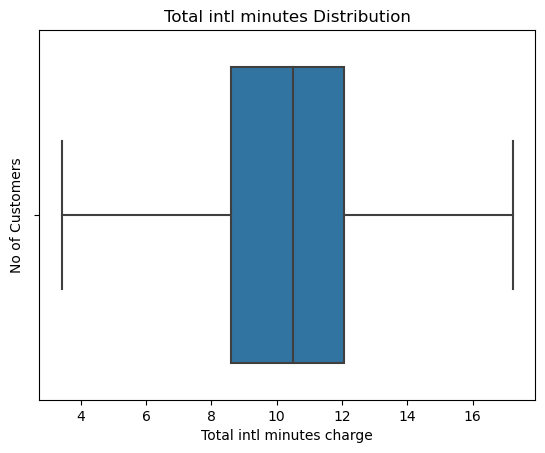

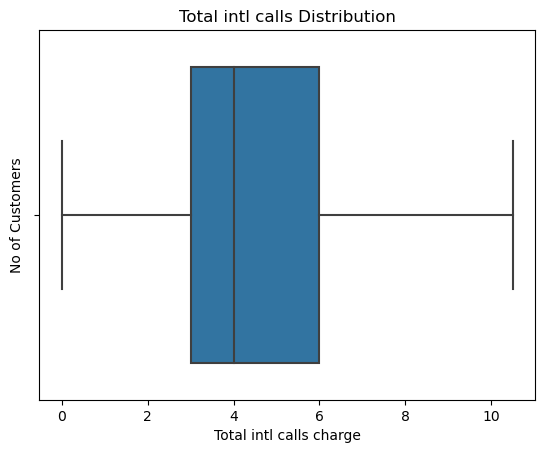

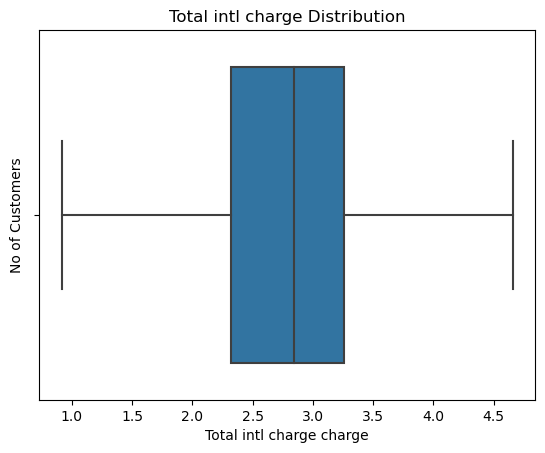

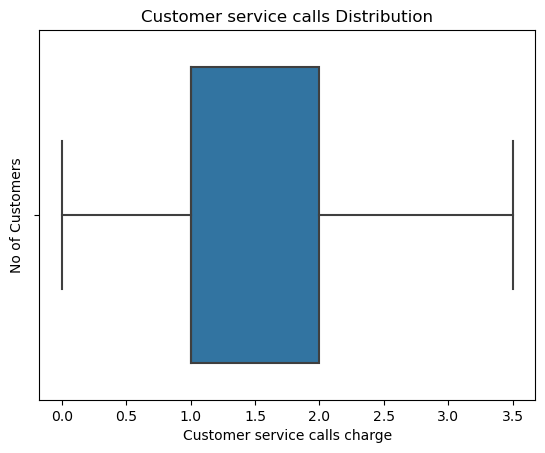

In [57]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [60]:
Tel_data.drop('State',axis=1,inplace=True)

In [62]:
Tel_data.replace(to_replace=['No','Yes'], value=[0,1],inplace=True)

In [63]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0


In [58]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [65]:
wardlink = linkage(Tel_data,method='ward')

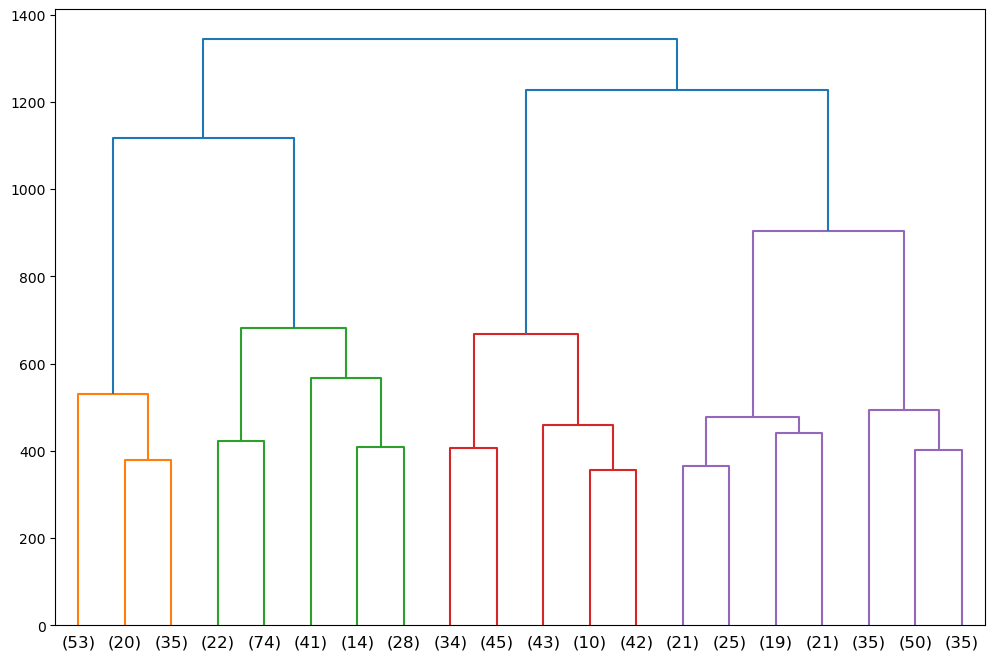

In [68]:
plt.figure(figsize=(12,8))
dendrogram(wardlink,truncate_mode='lastp',p=20);
#Saffron, green , red  and purple represent 4 cluster, its based on dendrogram plot

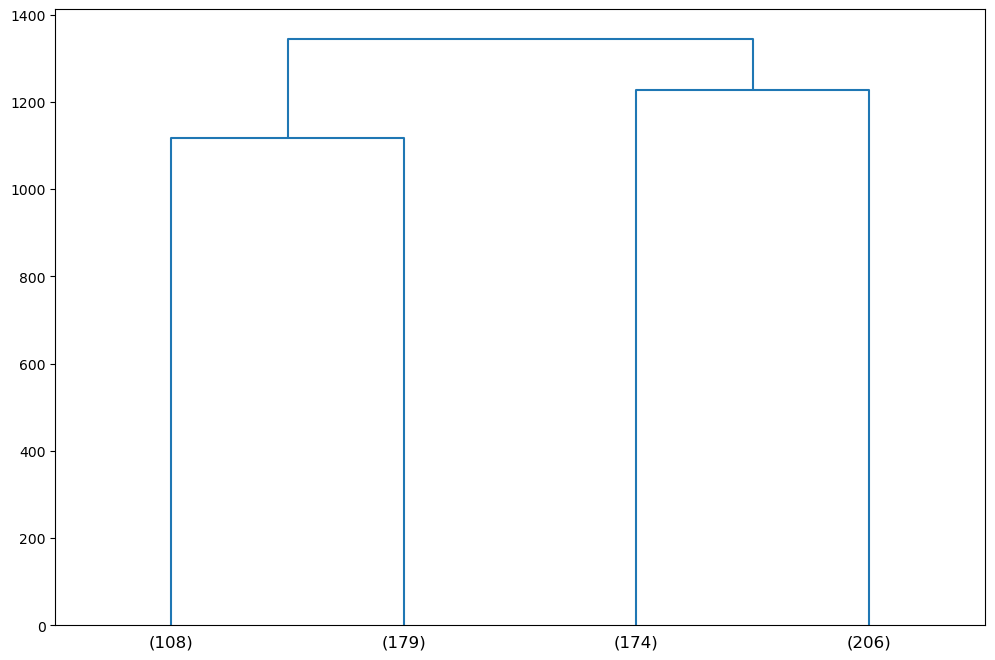

In [69]:
plt.figure(figsize=(12,8))
dendrogram(wardlink,truncate_mode='lastp',p=4);

In [75]:
from scipy.cluster.hierarchy import fcluster

In [76]:
Hie_Clus = fcluster(wardlink,4,criterion='maxclust')

In [77]:
Hie_Clus # Gices row number based on clustering

array([2, 3, 1, 4, 3, 2, 2, 2, 3, 2, 2, 4, 2, 3, 4, 3, 1, 2, 3, 1, 4, 3,
       1, 3, 4, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 4, 4, 4, 2, 1, 2, 4, 4, 3,
       2, 3, 2, 3, 3, 4, 3, 2, 4, 4, 2, 3, 1, 1, 4, 4, 1, 3, 1, 3, 1, 1,
       4, 3, 4, 2, 2, 2, 3, 3, 1, 2, 3, 1, 4, 4, 4, 4, 3, 3, 1, 2, 3, 1,
       3, 3, 4, 3, 2, 3, 2, 1, 2, 3, 4, 3, 3, 2, 2, 3, 4, 4, 4, 1, 2, 1,
       3, 4, 3, 3, 1, 2, 2, 3, 4, 2, 4, 2, 4, 2, 3, 2, 2, 4, 4, 3, 4, 4,
       3, 3, 1, 4, 2, 1, 2, 3, 4, 2, 3, 2, 3, 4, 1, 4, 3, 2, 4, 2, 3, 4,
       2, 3, 1, 1, 4, 2, 3, 1, 1, 3, 3, 4, 4, 4, 2, 2, 3, 2, 3, 4, 2, 1,
       2, 1, 3, 2, 1, 4, 4, 3, 1, 2, 4, 1, 2, 4, 3, 3, 4, 2, 4, 3, 4, 2,
       2, 4, 4, 3, 3, 1, 2, 4, 2, 2, 4, 1, 3, 4, 2, 1, 1, 3, 4, 2, 4, 4,
       4, 2, 2, 3, 3, 4, 1, 2, 2, 4, 3, 2, 2, 4, 4, 3, 2, 3, 3, 3, 4, 3,
       1, 4, 3, 4, 4, 2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2,
       4, 3, 2, 2, 4, 1, 3, 2, 4, 2, 4, 2, 2, 4, 3, 1, 2, 4, 4, 2, 4, 4,
       1, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 3, 4,

In [78]:
Tel_data['Hie_Clus'] = Hie_Clus

In [79]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Hie_Clus
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0,2
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5,3
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5,1
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0,4
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0,3
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0,3
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0,4
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0,4


In [81]:
round(Tel_data.pivot_table(values = num,index=['Hie_Clus'],aggfunc='mean'),1)
# Note - Total day minutes is the identifiable cluser in this analysis 248.1 176.0 127.9 194.9, As there point are numerically saperated

,Account length,Area code,Customer service calls,Number vmail messages,Total day calls,Total day charge,Total day minutes,Total eve calls,Total eve charge,Total eve minutes,Total intl calls,Total intl charge,Total intl minutes,Total night calls,Total night charge,Total night minutes
Hie_Clus,,,,,,,,,,,,,,,,
1,93.6,415.6,1.4,10.0,101.8,42.2,248.1,101.6,20.3,238.7,4.6,2.7,10.0,102.0,9.8,217.6
2,94.9,416.3,1.5,7.7,101.4,29.9,176.0,102.0,19.3,227.4,4.6,2.8,10.5,97.8,7.0,156.3
3,95.8,415.4,1.5,10.1,101.3,21.7,127.9,97.9,17.7,207.8,4.2,2.7,10.2,97.1,10.2,226.0
4,120.2,415.6,1.5,6.7,99.9,33.1,194.9,100.6,13.6,160.2,4.5,2.8,10.3,103.6,9.3,205.7


## KMeans Clustering

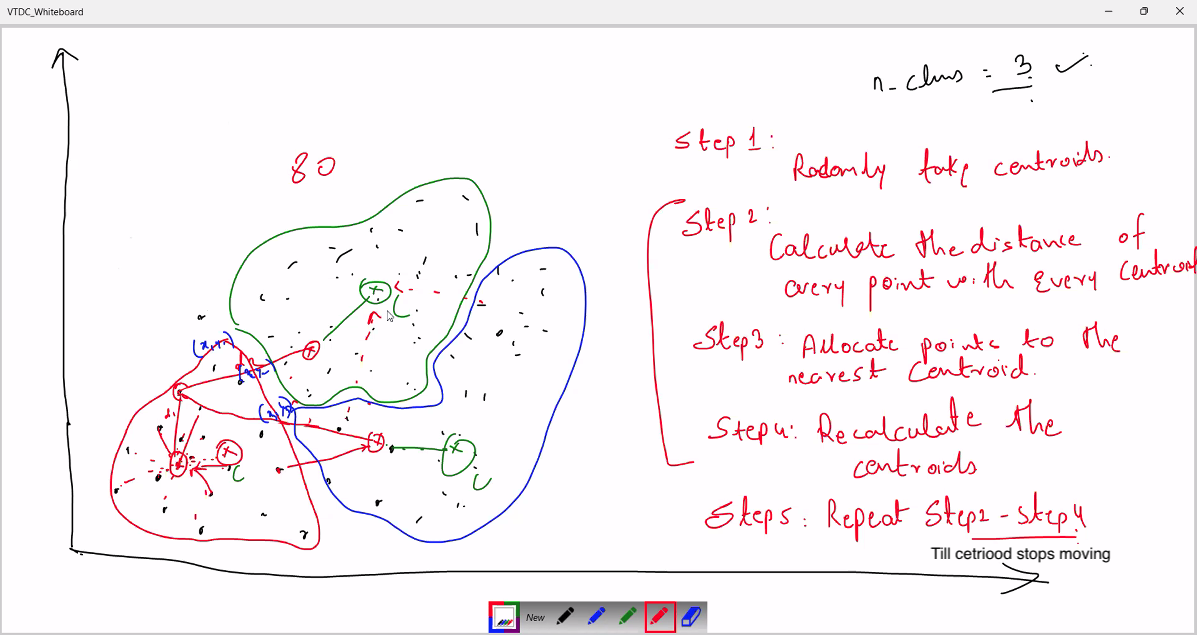

In [ ]:
# We need to scale data for calculation of equilarian distance
# There are multiple ways of scaling
    # Divide a data with Maximum of col [25,27,28,30,28] 
    #
    #
    #


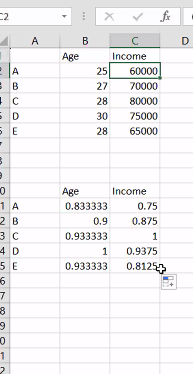

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
Tel_data.drop('Hie_Clus',axis=1,inplace=True)

In [84]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0


In [85]:
x = StandardScaler()
Tel_data_sc = x.fit_transform(Tel_data)

In [86]:
Tel_data_sc

array([[ 0.35102222, -1.25161578, -0.29380132, ..., -0.20685762,
        -0.56975561, -0.42238727],
       [-0.9308113 , -0.12270743, -0.29380132, ...,  0.65818333,
         0.8944156 ,  1.82428184],
       [ 1.43565059, -0.12270743, -0.29380132, ...,  1.95574474,
        -1.77634114,  1.82428184],
       ...,
       [-1.05406452, -0.12270743, -0.29380132, ...,  1.52322427,
         1.07065843,  1.37494802],
       [ 1.3863493 , -0.12270743, -0.29380132, ..., -0.20685762,
         0.48770137, -0.42238727],
       [ 2.00261542,  1.57065509,  3.40366063, ...,  2.38826522,
        -1.92546969,  0.47628038]])

In [87]:
from sklearn.cluster import KMeans, DBSCAN

In [89]:
K_means = KMeans(n_clusters=2)
K_means.fit(Tel_data_sc)
print(K_means.inertia_)

/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10715.668074166682


In [101]:
K_means.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [90]:
K_means = KMeans(n_clusters=3)
K_means.fit(Tel_data_sc)
print(K_means.inertia_)

10036.618772359354


/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
Inertia = []
for i in range(1,11):
    K_means = KMeans(n_clusters=i);
    K_means.fit(Tel_data_sc);
    Inertia.append(K_means.inertia_)

/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

In [92]:
Inertia #inertia are dropping as n_cluster value increases

[12006.000000000013,
 10715.668074166682,
 10034.967943817366,
 9507.54736807533,
 9059.800482996743,
 8736.538983408633,
 8455.434853014944,
 8226.244573615915,
 8064.573250738937,
 7889.724476342961]

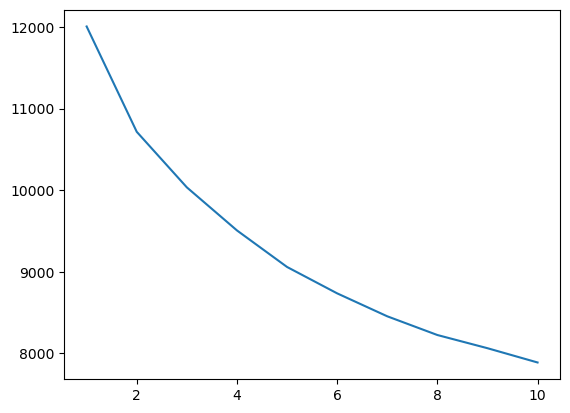

In [93]:
# Elbow chart - > Where ever the elbow we need to go for that cluster
plt.plot(range(1,11),Inertia)

## Selected where drop of inertia is Maximum Which is N=2
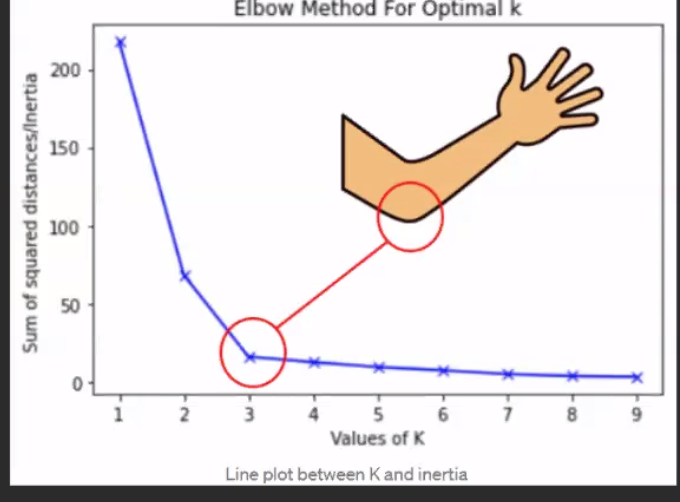
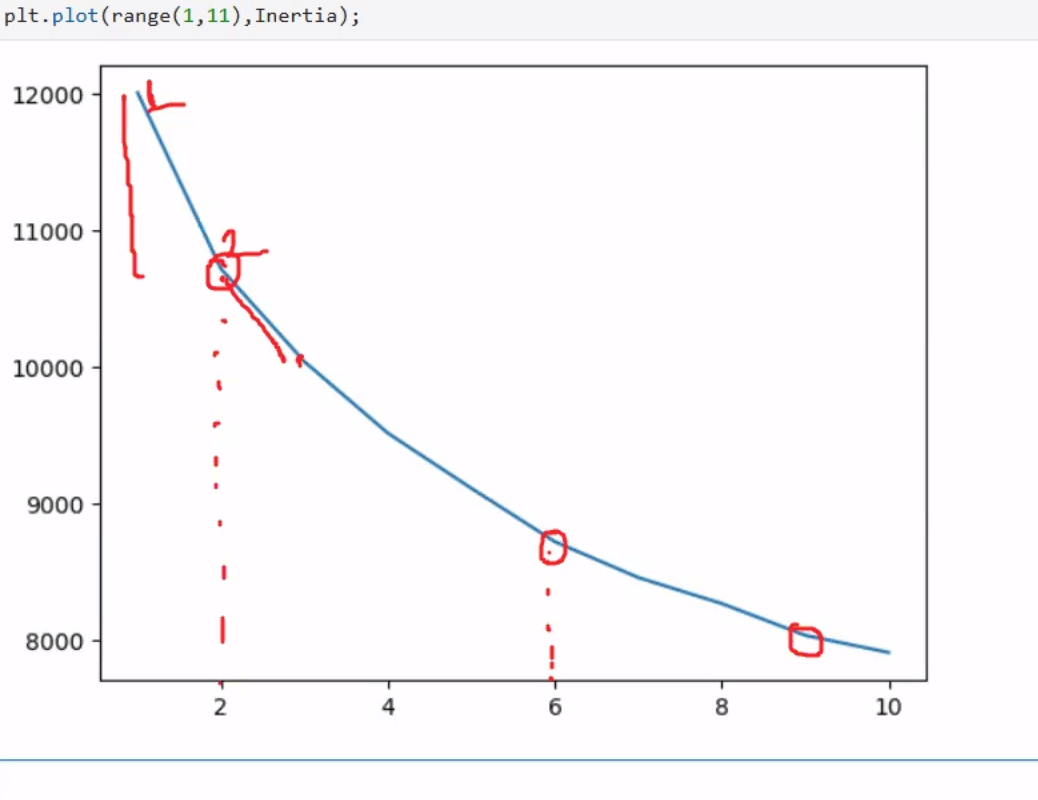

In [95]:
Inertia.clear

<function list.clear()>

In [96]:
Inertia = []
for i in range(1,20):
    K_means = KMeans(n_clusters=i);
    K_means.fit(Tel_data_sc);
    Inertia.append(K_means.inertia_)

/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

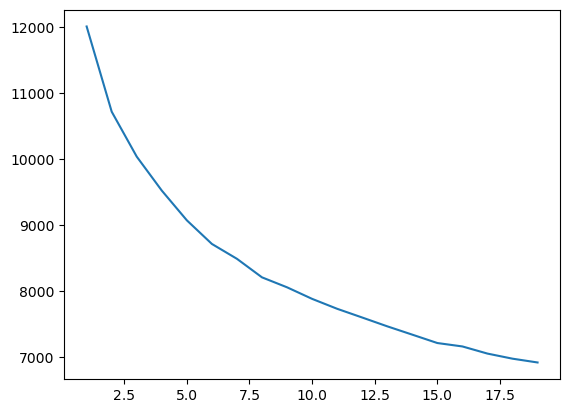

In [97]:
# Elbow chart - > Where ever the elbow we need to go for that cluster
plt.plot(range(1,20),Inertia)

In [98]:
# Either go for 2 or 16 cluster, we go for least cluster

In [99]:
K_means = KMeans(n_clusters=2)
K_means.fit(Tel_data_sc)


/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [102]:
Tel_data['K_means_clus'] = K_means.labels_

In [103]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,K_means_clus
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0,1
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5,1
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5,1
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0,1
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0,0
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0,0
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0,1
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0,1


In [104]:
Tel_data['Hie_clus'] = Hie_Clus

In [105]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,K_means_clus,Hie_clus
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0,1,2
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5,1,3
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5,1,1
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0,1,4
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0,0,3
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0,0,3
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0,1,4
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0,1,4


# Note:

## Thumb Rule - Very important

### Small Data(2K) - Hirarical cluster works Best 
### KMeans(20K) - Kmeans works Best 

In [ ]:
#Next # DBCluster, classification , null value testing, feature engineering